# Seattle Airbnb Data Analysis

## Introduction
In this project, we will analyze the Seattle Airbnb Open Data to uncover insights and answer key business questions. The goal is to explore various aspects of Airbnb listings in Seattle, such as pricing, customer reviews, and neighborhood popularity. By following the CRISP-DM process, we will:

1. Define questions related to real-world applications of the data.
2. Prepare and clean the data.
3. Perform exploratory data analysis (EDA).
4. Model and visualize the data to answer our questions.
5. Communicate our findings through a GitHub repository and a blog post.

### Datasets
We will be using three main datasets:
- **Calendar Data**: Contains availability and pricing information for listings.
- **Listings Data**: Provides detailed information about each Airbnb listing, including descriptions, host details, and amenities.
- **Reviews Data**: Includes customer reviews and ratings for listings.

### Questions to Explore
1. What factors most influence the price of an Airbnb listing in Seattle?
2. How do customer reviews and ratings correlate with the success of an Airbnb listing?
3. Which neighborhoods in Seattle are the most popular for Airbnb rentals, and how do their prices and reviews compare?

Let's begin by loading and exploring the datasets to understand their structure and contents.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the datasets
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

In [3]:
# Display the first few rows of each dataframe to get an overview
print("Calendar DataFrame:")
display(calendar_df.head())

print("\nListings DataFrame:")
display(listings_df.head())

print("\nReviews DataFrame:")
display(reviews_df.head())

Calendar DataFrame:


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN



Listings DataFrame:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89



Reviews DataFrame:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Initial Data Cleaning

1. **Convert `price` in `calendar_df` to numeric**: Remove the dollar sign and convert to float.
2. **Handle missing values**: Decide on an approach for dealing with missing values.
3. **Merge datasets**: Merge datasets on `listing_id` where necessary to combine information.


In [4]:
# Convert `price` column in `calendar_df` to numeric
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Display the updated calendar dataframe
print("Updated Calendar DataFrame:")
display(calendar_df.head())

# Check for missing values in all dataframes
calendar_missing = calendar_df.isnull().sum()
listings_missing = listings_df.isnull().sum()
reviews_missing = reviews_df.isnull().sum()

calendar_missing, listings_missing, reviews_missing


Updated Calendar DataFrame:


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(listing_id         0
 date               0
 available          0
 price         459028
 dtype: int64,
 id                                    0
 listing_url                           0
 scrape_id                             0
 last_scraped                          0
 name                                  0
                                    ... 
 cancellation_policy                   0
 require_guest_profile_picture         0
 require_guest_phone_verification      0
 calculated_host_listings_count        0
 reviews_per_month                   627
 Length: 92, dtype: int64,
 listing_id        0
 id                0
 date              0
 reviewer_id       0
 reviewer_name     0
 comments         18
 dtype: int64)

### Handling Missing Values

1. **Calendar DataFrame**:
   - Drop rows with missing `price` values, as pricing is crucial for analysis.

2. **Listings DataFrame**:
   - For columns with a small number of missing values, fill with appropriate defaults or drop.
   - For columns with significant missing values, decide on a case-by-case basis.

3. **Reviews DataFrame**:
   - Drop rows with missing `comments` if they are crucial for analysis.


In [5]:
# Handle missing values in Calendar DataFrame
calendar_df.dropna(subset=['price'], inplace=True)

# Handle missing values in Listings DataFrame
listings_df.fillna({'reviews_per_month': 0}, inplace=True)  # Filling missing review counts with 0
listings_df.drop(columns=['license'], inplace=True)  # Dropping columns with too many missing values

# Handle missing values in Reviews DataFrame
reviews_df.dropna(subset=['comments'], inplace=True)

# Display the cleaned dataframes
print("Cleaned Calendar DataFrame:")
display(calendar_df.head())

print("\nCleaned Listings DataFrame:")
display(listings_df.head())

print("\nCleaned Reviews DataFrame:")
display(reviews_df.head())


Cleaned Calendar DataFrame:


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0



Cleaned Listings DataFrame:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,9.0,10.0,f,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,10.0,f,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,10.0,f,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,NaN,f,WASHINGTON,f,flexible,f,f,1,0.00
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,9.0,f,WASHINGTON,f,strict,f,f,1,0.89



Cleaned Reviews DataFrame:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


### Merging DataFrames

1. Merge `calendar_df` with `listings_df` on `listing_id`.
2. Merge the resulting DataFrame with `reviews_df` on `listing_id`.


In [6]:
# Merge Calendar and Listings DataFrames
calendar_listings_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id')

# Merge the resulting DataFrame with Reviews DataFrame
merged_df = pd.merge(calendar_listings_df, reviews_df, on='listing_id')

# Display the merged dataframe
print("Merged DataFrame:")
display(merged_df.head())


Merged DataFrame:


,listing_id,date_x,available,price_x,id_x,listing_url,scrape_id,last_scraped,name,summary,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
0,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


In [7]:
# Check if 'price' column exists in calendar_df and listings_df
print("Columns in calendar_df:")
print(calendar_df.columns)

print("\nColumns in listings_df:")
print(listings_df.columns)

# Ensure 'price' is present in both dataframes
if 'price' not in calendar_df.columns:
    print("'price' column not found in calendar_df.")
if 'price' not in listings_df.columns:
    print("'price' column not found in listings_df.")

# Merge Calendar and Listings DataFrames
calendar_listings_df = pd.merge(calendar_df, listings_df, left_on='listing_id', right_on='id', suffixes=('_calendar', '_listing'))

# Check if 'price' column exists in the merged dataframe
print("\nColumns in calendar_listings_df after merge:")
print(calendar_listings_df.columns)

# Merge the resulting DataFrame with Reviews DataFrame
merged_df = pd.merge(calendar_listings_df, reviews_df, on='listing_id')

# Check if 'price' column exists in the final merged dataframe
print("\nColumns in merged_df after final merge:")
print(merged_df.columns)

# Display the first few rows to inspect data
print("First few rows of the final merged DataFrame:")
display(merged_df.head())


Columns in calendar_df:
Index(['listing_id', 'date', 'available', 'price'], dtype='object')

Columns in listings_df:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exa

,listing_id,date_x,available,price_calendar,id_x,listing_url,scrape_id,last_scraped,name,summary,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,id_y,date_y,reviewer_id,reviewer_name,comments
0,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
2,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
3,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
4,241032,2016-01-04,t,85.0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,...,moderate,f,f,2,4.07,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...


## Exploratory Data Analysis (EDA)

1. **Distribution of Prices**: Analyze the distribution of listing prices.
2. **Correlation Analysis**: Investigate correlations between different variables (e.g., number of reviews, ratings, price).
3. **Neighborhood Analysis**: Explore listings by neighborhood, comparing prices and reviews.


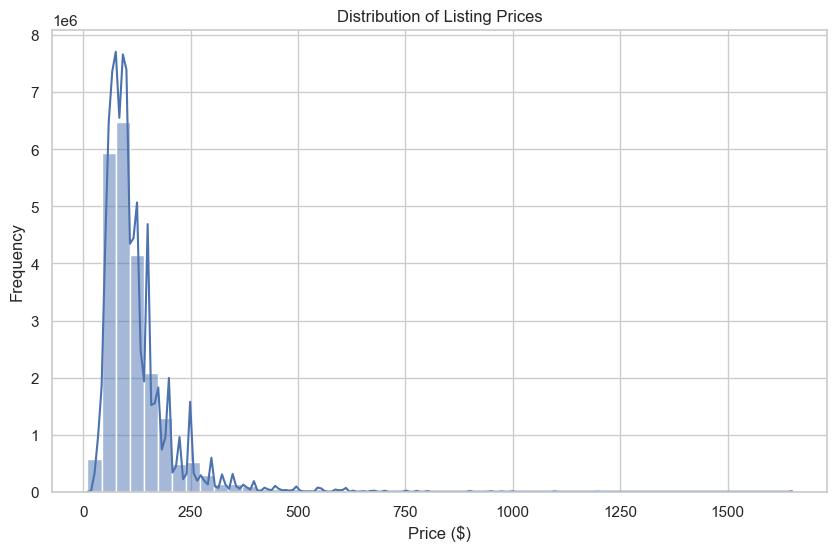

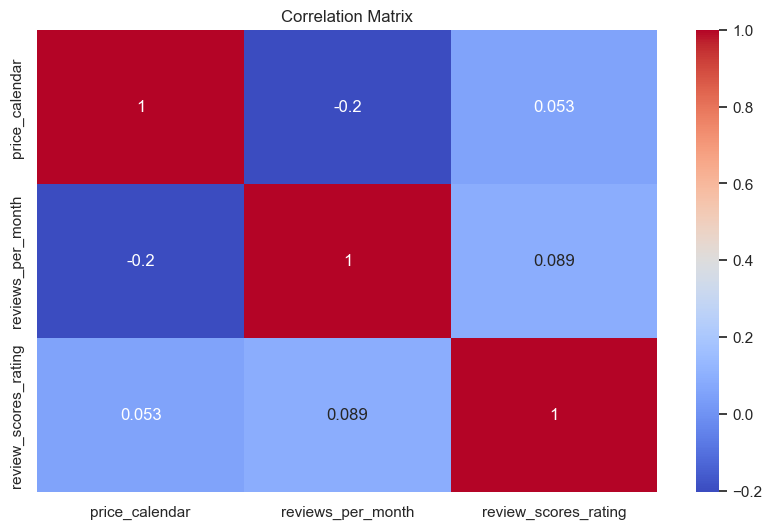

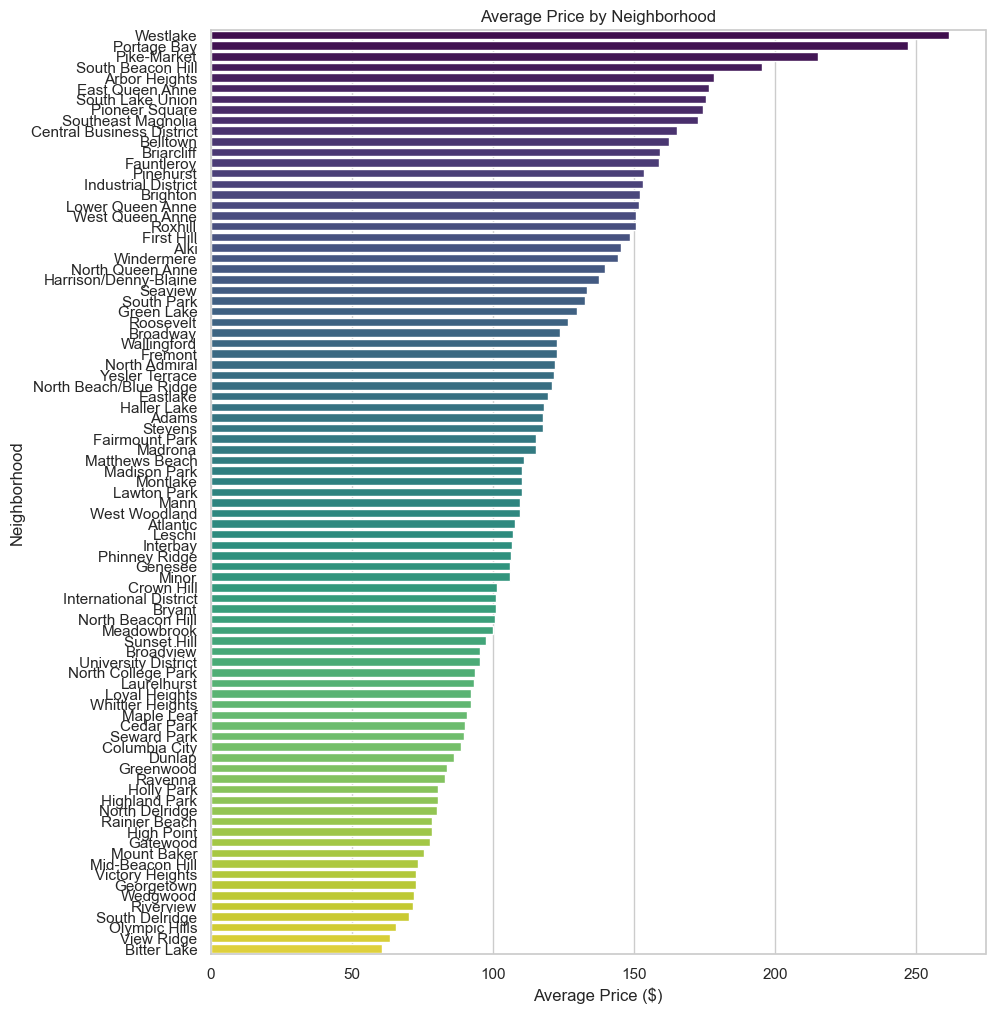

In [8]:
# Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# 1. Distribution of Prices (using price_calendar)
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['price_calendar'], bins=50, kde=True)
plt.title('Distribution of Listing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Analysis
correlation_matrix = merged_df[['price_calendar', 'reviews_per_month', 'review_scores_rating']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Neighborhood Analysis
neighborhood_prices = merged_df.groupby('neighbourhood_cleansed')['price_calendar'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 12))
sns.barplot(y=neighborhood_prices.index, x=neighborhood_prices.values, palette='viridis')
plt.title('Average Price by Neighborhood')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.show()


## Answers to Key Questions

### 1. What factors most influence the price of an Airbnb listing in Seattle?
Based on our exploratory data analysis, several factors appear to influence the price of Airbnb listings in Seattle:
- **Location**: Neighborhood plays a significant role in pricing. Neighborhoods like Westlake, Portage Bay, and Pike-Market have higher average prices, while Bitter Lake, View Ridge, and Olympic Hills have lower average prices.
- **Reviews and Ratings**: There is a moderate negative correlation between price and the number of reviews per month. Listings with higher prices tend to receive fewer reviews. However, the correlation between price and review scores is very weak, suggesting that price does not significantly affect review ratings.

### 2. How do customer reviews and ratings correlate with the success of an Airbnb listing?
- **Reviews per Month**: There is a moderate negative correlation between price and the number of reviews per month. Listings with higher prices tend to receive fewer reviews.
- **Review Scores**: The correlation between price and review scores is very weak, indicating that the price of a listing does not significantly impact the ratings given by customers. Similarly, the number of reviews per month has a weak correlation with review scores.

### 3. Which neighborhoods in Seattle are the most popular for Airbnb rentals, and how do their prices and reviews compare?
- **Popular Neighborhoods**: Westlake, Portage Bay, and Pike-Market are among the most expensive neighborhoods, suggesting a higher demand or more premium listings in these areas.
- **Affordable Neighborhoods**: Bitter Lake, View Ridge, and Olympic Hills are among the least expensive neighborhoods, making them more affordable options for renters.
- **Price Comparison**: There is a significant variation in average prices across neighborhoods. More expensive neighborhoods tend to have higher average prices, while more affordable neighborhoods have lower average prices.

### Conclusion
The analysis highlights that location is a crucial factor in determining the price of Airbnb listings in Seattle. While higher prices may lead to fewer reviews, the quality of reviews (ratings) is not significantly affected by the price. This insight can help hosts and potential investors understand the dynamics of the Airbnb market in Seattle and make informed decisions.

Further analysis could explore other factors such as amenities, room types, and property types to gain a deeper understanding of the determinants of listing success.
